# A Monte Carlo vs Quasi-Monte Carlo Comparison

Monte Carlo algorithms work on independent identically distributed (IID) points while Quasi-Monte Carlo algorithms work on low discrepancy sequences (LDS). LDS generators, such as those for the lattice and Sobol sequences, provide samples whose space filling properties can be exploited by Quasi-Monte Carlo algorithms.

In [1]:
import pandas as pd
pd.options.display.float_format = '{:.2e}'.format

from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
distrib_names = ['IIDStdUniform','IIDStdGaussian','Lattice','Sobol']

# Absolute Tolerance Plots

<b>Testing Parameters</b><br>
- relative tolerance = 0
- lds initial sample size = 32
- iid initial sample size = 256
- Results averaged over 3 trials

Keister Integrand
- $y_i = \pi^{d/2} \cos(||x_i||_2)$
- $d=3$

Gaussian True Measure
- $\mathcal{N}_3(0,\frac{1}{2})$
<br>

Data for the following plot can be generated by running
~~~
python workouts/wo_mc_vs_qmc/comp_abstols.py
~~~

In [3]:
df_abstols = pd.read_csv('../outputs/mc_vs_qmc/abs_tol.csv')
df_abstols.loc[::25].style.hide_index()

abs_tol,IIDStdUniform_solution,IIDStdGaussian_solution,Lattice_solution,Sobol_solution,IIDStdUniform_time,IIDStdGaussian_time,Lattice_time,Sobol_time,IIDStdUniform_n,IIDStdGaussian_n,Lattice_n,Sobol_n
0.001,nan,0.722812,0.722805,0.722832,nan,1.14761,0.00491103,0.0358956,nan,1.41952e+07,682.667,2730.67
0.006,0.72301,0.722584,0.722722,0.723155,0.117142,0.0318606,0.00186841,0.0164597,379712,394476,170.667,341.333
0.011,0.724931,0.723321,0.722662,0.723328,0.0336874,0.00912529,0.00133779,0.012137,113092,117485,85.3333,170.667
0.016,0.72614,0.724983,0.722662,0.723328,0.0156919,0.00437742,0.00130293,0.0131167,53544,55620,85.3333,170.667
0.021,0.728302,0.724899,0.722662,0.723328,0.00934364,0.00243531,0.00129065,0.0118065,31153.7,32359,85.3333,170.667
0.026,0.727016,0.724396,0.722822,0.723458,0.00629663,0.0016225,0.000919649,0.0108652,20383,21169.3,42.6667,85.3333
0.031,0.730251,0.724557,0.723904,0.723458,0.00468971,0.00134581,0.000663154,0.0128239,14389,14942,21.3333,85.3333
0.036,0.724674,0.724702,0.723904,0.723851,0.00364054,0.00103425,0.000717238,0.0104059,10713.7,11123.7,21.3333,42.6667
0.041,0.725528,0.721291,0.723904,0.723851,0.00325612,0.000946033,0.000675214,0.00963424,8299,8615.33,21.3333,42.6667
0.046,0.721912,0.724686,0.723904,0.723851,0.00461814,0.00100436,0.000887403,0.0109651,6628,6879.33,21.3333,42.6667


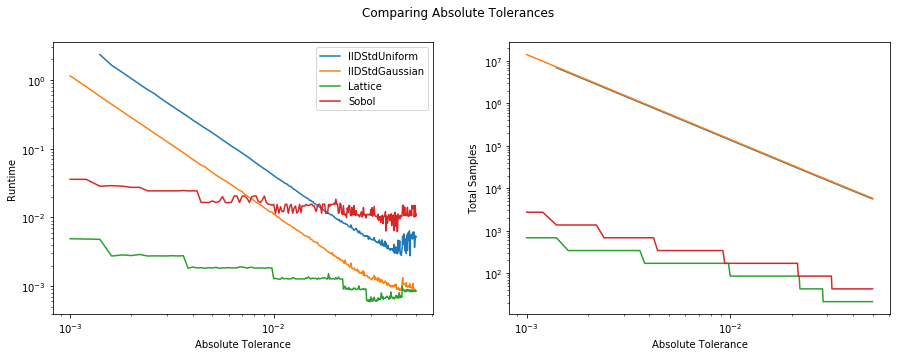

In [4]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
abstols = df_abstols['abs_tol'].values
for distrib_name in distrib_names:
    times = df_abstols[distrib_name+'_time'].values
    n_total = df_abstols[distrib_name+'_n'].values
    ax[0].loglog(abstols, times, label=distrib_name)
    ax[1].loglog(abstols, n_total, label=distrib_name)
ax[0].legend(loc='upper right')
ax[0].set_xlabel('Absolute Tolerance')
ax[0].set_ylabel('Runtime')
ax[1].set_xlabel('Absolute Tolerance')
ax[1].set_ylabel('Total Samples')
fig.suptitle('Comparing Absolute Tolerances')
plt.savefig('../outputs/mc_vs_qmc/abstols_plot.png',dpi=200)

<center>Quasi-Monte Carlo takes less time and fewer samples to achieve the same accuracy as regular Monte Carlo<br>
This  number of points for Monte Carlo algorithms is $\mathcal{O}(1/\epsilon^2)$ while Quasi-Monte Carlo algorithms can be as efficient as $\mathcal{O}(1/\epsilon)$
</center>

# Dimension Plots
<b>Testing Parameters</b><br>
- absolute tolerance = 0
- relative tolerance = .01
- lds initial sample size = 32
- iid initial sample size = 256
- Results averaged over 3 trials

Keister Integrand
- $y_i = \pi^{d/2} \cos(||x_i||_2)$

Gaussian True Measure
- $\mathcal{N}_d(0,\frac{1}{2})$
<br>

Data for the following plot can be generated by running
~~~
python workouts/wo_mc_vs_qmc/comp_dimensions.py
~~~

In [5]:
df_dimensions = pd.read_csv('../outputs/mc_vs_qmc/dimension.csv')
df_dimensions.dimension = df_dimensions.dimension.astype(int)
df_dimensions.loc[::4].style.hide_index()

dimension,IIDStdUniform_solution,IIDStdGaussian_solution,Lattice_solution,Sobol_solution,IIDStdUniform_time,IIDStdGaussian_time,Lattice_time,Sobol_time,IIDStdUniform_n,IIDStdGaussian_n,Lattice_n,Sobol_n
1,0.460108,0.461123,0.460099,0.459793,0.001007,0.000335375,0.00056274,0.00437529,3995,3331,21.3333,21.3333
5,0.378211,0.377494,0.379103,0.378883,0.814364,0.0503418,0.00394153,0.02848,1.55472e+06,415497,341.333,682.667
9,-23.6903,-23.8344,-23.8849,-23.8672,0.028255,0.005591,0.00351507,0.0261701,28459.7,29839.7,170.667,170.667
13,-399.334,-400.61,-401.085,-401.037,0.0086464,0.00251804,0.00597106,0.03662,4537.33,5826.33,170.667,170.667
17,-4776.3,-4760.83,-4772.14,-4772.88,0.00368726,0.000879016,0.00547441,0.0368324,1758.67,1818,170.667,85.3333
21,-48919.6,-48850.7,-48725.3,-48667.1,0.00332601,0.00070612,0.00393924,0.0421246,1211.67,944.333,85.3333,85.3333
25,-454219,-452007,-452298,-452194,0.00643447,0.00105093,0.00746445,0.0505719,2369.67,2100.67,170.667,170.667
29,-3.87576e+06,-3.85377e+06,-3.84776e+06,-3.83748e+06,0.0153839,0.00247255,0.00862802,0.057724,5434.33,4454.33,170.667,170.667
33,-2.9858e+07,-2.96617e+07,-2.95862e+07,-2.96378e+07,0.041836,0.00504077,0.00521742,0.0603707,11939,8713,85.3333,170.667
37,-1.98948e+08,-1.98654e+08,-1.98568e+08,-1.9902e+08,0.131707,0.0169234,0.010719,0.0641265,35589.7,26123.3,170.667,170.667


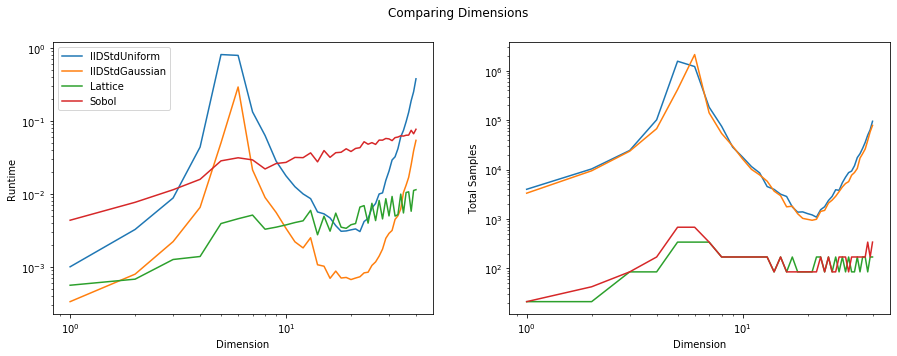

In [6]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
dimensions = df_dimensions['dimension']
for distrib_name in distrib_names:
    times = df_dimensions[distrib_name+'_time'].values
    n_total = df_dimensions[distrib_name+'_n'].values
    ax[0].loglog(dimensions, times, label=distrib_name)
    ax[1].loglog(dimensions, n_total, label=distrib_name)
ax[0].legend(loc='upper left')
ax[0].set_xlabel('Dimension')
ax[0].set_ylabel('Runtime')
ax[1].set_xlabel('Dimension')
ax[1].set_ylabel('Total Samples')
fig.suptitle('Comparing Dimensions')
plt.savefig('../outputs/mc_vs_qmc/dimension_plot.png',dpi=200)